In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_smile.xml')

In [3]:
def detect(gray, frame):
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255,0,0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eyes_cascade.detectMultiScale(roi_gray, 1.1, 5)
        smiles = smile_cascade.detectMultiScale(roi_gray, 1.7, 22)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ew), (ex+ew, ey+eh), (0, 0, 255), 2)
        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(roi_color, (sx, sw), (sx+sw, sy+sh), (0, 255, 0), 2)
    return frame

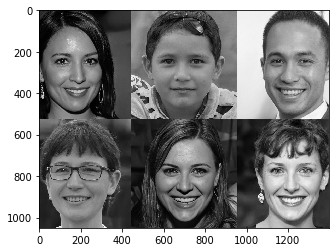

In [4]:
faces_color_image = plt.imread('Faces/fake_ai_faces.jpg')
faces_gray_image = cv2.cvtColor(faces_color_image, cv2.COLOR_BGR2GRAY)
plt.imshow(faces_gray_image, cmap="gray")

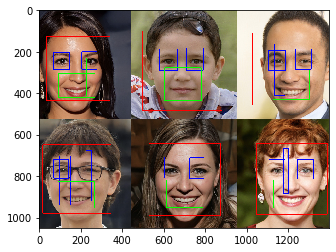

In [5]:
test_faces = detect(faces_gray_image, faces_color_image)
plt.imshow(test_faces)

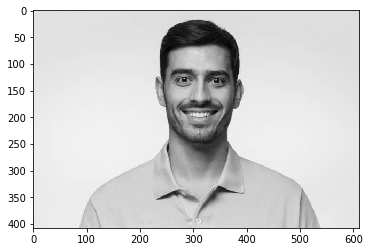

In [6]:
single_male_smile = plt.imread('Faces/frontal_smile.jpg')
single_male_smile_gray = cv2.cvtColor(single_male_smile, cv2.COLOR_BGR2GRAY)
plt.imshow(single_male_smile_gray, cmap="gray")

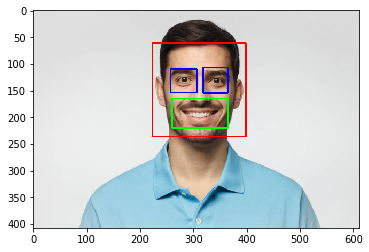

In [7]:
male_smile_detect = detect(single_male_smile_gray, single_male_smile)
plt.imshow(male_smile_detect)

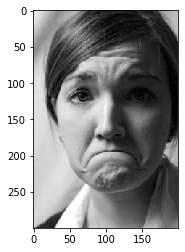

In [8]:
female_frown_color = plt.imread('Faces/frown2.jpg')
female_frown_gray = cv2.cvtColor(female_frown_color, cv2.COLOR_BGR2GRAY)
plt.imshow(female_frown_gray, cmap="gray")

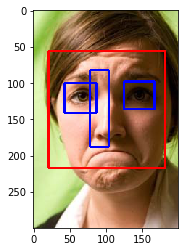

In [9]:
female_frown_test = detect(female_frown_gray, female_frown_color)
plt.imshow(female_frown_test)